<a href="https://colab.research.google.com/github/jhiltonsantos/ADS-Estatistica-IFPI/blob/master/AcidentesAereosBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados de Acidentes Aereos (Período 2008-2018)**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Objetivos
  Identificar, através dos anos, quais os principais tipos de acidentes em cada região do país,e observar as rotas com maiores números de ocorrências.Para isso iremos levantar:<br>  
  •Apontar qual a relação entre a quantidade de acidentes e as rotas<br>  <br>•Identificar quais os principais tipo de acidentes em cada região do país;<br>
  <br>•Observar características das aeronaves, como: ano de fabricação, modelo, tipo de motor,quantidade assentos, fabricante. E sua relação com o tipo de acidente.<br>

<br> Mostrar os incidentes no país inteiro, depois focar na região de maior incidentes (sudeste) mostrar o numero de acididentes, quantidade de fatais, principais motivos e as principais áreas de atuação.<br>


### Links para Ajuda

In [0]:
# http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
# https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b
# https://plot.ly/python/bubble-maps/
# https://python-visualization.github.io/folium/quickstart.html

### Bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from itertools import product
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import folium
import os

from decimal import Decimal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


### Funções

In [0]:
def tem_numero(string): # Retornar se string possue numero
  return any(char.isdigit() for char in string)

def remove_repetidos(array): # Remover Elementos Repetidos do Array
    l = []
    for i in array:
        if i not in l:
            l.append(i)
    l.sort()
    return l

## Importar Dados

### Dados Originais

In [0]:
dados = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/Projeto%20Final/accidents_table_types_edited.csv')
dados.dataframeName = 'Accidents'
nRow, nCol, = dados.shape

dados

### Remover Dados Que Não Serão Manipulados (Fator_*)

In [0]:
remover_fator = []
for i in range(1, len(dados.columns)):
  if tem_numero(dados.columns[i]) == True:
    remover_fator.append(dados.columns[i])

dados.drop(columns=remover_fator, inplace=True)
dados.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao
0,201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,2012-11-15,12:40:00,ABADIA DE GOIAS,GO,BRASIL,****,PPZGV,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,1.0,430,2.0,1985.0,BRASIL,PET,EXPERIMENTAL,****,****,MANOBRA,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06
1,200912289948837,ACIDENTE,PERDA DE CONTROLE EM VOO,2009-12-28,17:30:00,ACEGUA,RS,BRASIL,****,PRSUB,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1812,1.0,1973.0,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0,1,2018-05-06


### Quantidade de Dados Distintos

In [0]:
dados_distintos = pd.DataFrame(dados.nunique())
dados_distintos

,0
codigo_ocorrencia,5063
ocorrencia_classificacao,3
ocorrencia_tipo,60
ocorrencia_dia,2680
ocorrencia_horario,915
ocorrencia_cidade,992
ocorrencia_uf,28
ocorrencia_pais,1
ocorrencia_aerodromo,461
aeronave_matricula,3770


### Quantidade de Acidentes por Estados

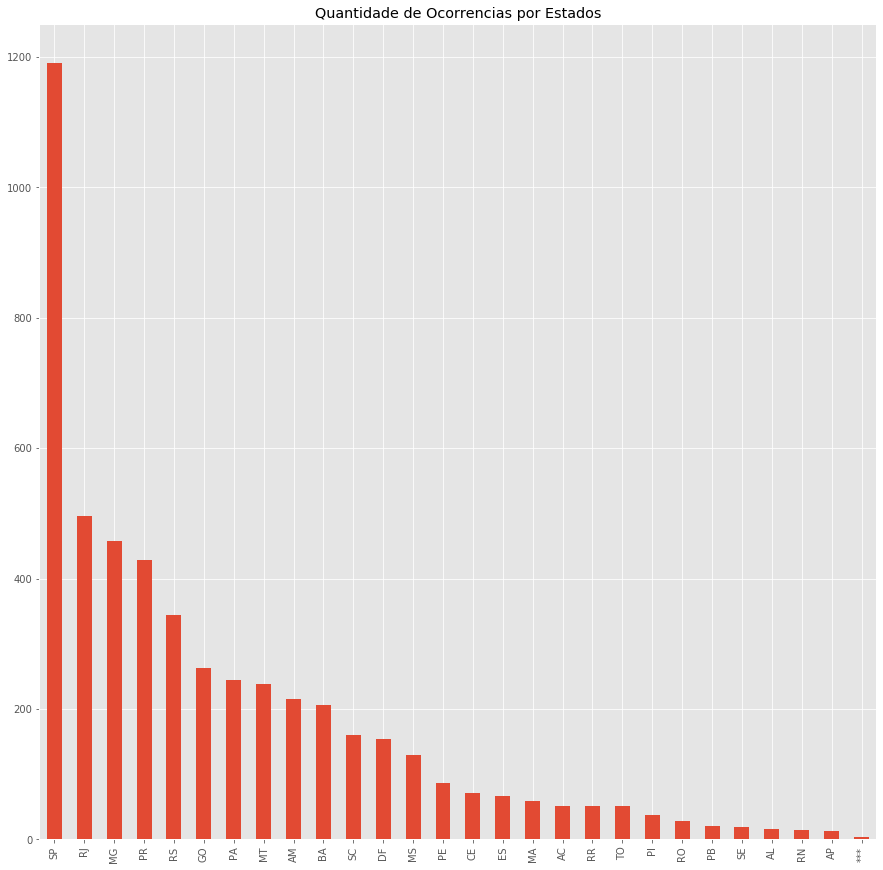

In [0]:
plt.style.use("ggplot")
acidentes_uf_bar = dados['ocorrencia_uf'].value_counts().plot(kind='bar',
                                                         subplots=True,
                                                         label='Quantidade de Ocorrencias por Estados',
                                                         figsize=(15,15))

### Adicionando Coluna "ano" aos Dados

In [0]:
data_ocorrencias = []
for i in range(len(dados)):
  data_ocorrencias.append(dados['ocorrencia_dia'][i])

anos_ocorrencias = []
ano = []
for i in range(len(data_ocorrencias)):
  ano.append(data_ocorrencias[i].split('-'))
  anos_ocorrencias.append(ano[i][0])

# Transformar anos para inteiro
anos_int = []
for i in range(len(anos_ocorrencias)):
  anos_int.append(int(anos_ocorrencias[i]))
anos_int

dados['ano'] = anos_int
# Rows 5116
dados.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao,ano
0,201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,2012-11-15,12:40:00,ABADIA DE GOIAS,GO,BRASIL,****,PPZGV,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,1.0,430,2.0,1985.0,BRASIL,PET,EXPERIMENTAL,****,****,MANOBRA,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06,2012
1,200912289948837,ACIDENTE,PERDA DE CONTROLE EM VOO,2009-12-28,17:30:00,ACEGUA,RS,BRASIL,****,PRSUB,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1812,1.0,1973.0,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0,1,2018-05-06,2009


### Dados de Latitude e Longitude (Decimal) dos Estados


In [121]:
dados_lat_long = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/MunicipiosBrasil.csv')

dados_lat_long

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
0,2.0,-10.94,-69.56,ASSIS BRASIL - AC,ASSIS BRASIL,AC,17.842.150.988.839
1,3.0,-11.01,-68.74,BRASILEIA - AC,BRASILEIA,AC,9.337.339.431.323
2,4.0,-9.83,-67.95,BUJARI - AC,BUJARI,AC,2.851.656.749.286
3,5.0,-10.57,-67.67,CAPIXABA - AC,CAPIXABA,AC,18.886.455.136.104
4,6.0,-7.63,-72.67,CRUZEIRO DO SUL - AC,CRUZEIRO DO SUL,AC,36.458.613.831.064
...,...,...,...,...,...,...,...
5510,NaN,-14.53,-59.54,CONQUISTA D'OESTE - MT,CONQUISTA D'OESTE,MT,NaN
5511,NaN,-18.67,-53.63,FIGUEIRAO - MS,FIGUEIRAO,MS,NaN
5512,NaN,-12.08,-45.78,LUIS EDUARDO MAGALHAES - BA,LUIS EDUARDO MAGALHAES,BA,NaN
5513,NaN,-23.53,-46.21,MOGI DAS CRUZES - SP,MOGI DAS CRUZES,SP,NaN


In [0]:
# Esses Dados já foram inseridos em um novo CSV

# Criando colunas latitude e longitude
#dados['latitude'] = -9.42
#dados['longitude'] = -30.89

# Passando valores de base_geo_br.csv para dados
#for i in range(len(dados_lat_long)):
#  for k in range(len(dados)):
#    if (dados['ocorrencia_cidade'][k] == dados_lat_long['MUNICIPIO'][i]) and (dados['ocorrencia_uf'][k] == dados_lat_long['UF'][i]):
#      dados['latitude'][k] = dados_lat_long['LATITUDE'][i]
#      dados['longitude'][k] = dados_lat_long['LONGITUDE'][i]

In [0]:
#export_csv = dados.to_csv(r'drive/My Drive/dados_prontos.csv', index = None, header=True)

### Dados Prontos

In [123]:
dados_prontos = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/dados_prontos.csv')
dados_prontos.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao,ano,latitude,longitude
0,201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,2012-11-15,12:40:00,ABADIA DE GOIAS,GO,BRASIL,****,PPZGV,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,1.0,430,2.0,1985.0,BRASIL,PET,EXPERIMENTAL,****,****,MANOBRA,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06,2012,-16.75,-49.43
1,200912289948837,ACIDENTE,PERDA DE CONTROLE EM VOO,2009-12-28,17:30:00,ACEGUA,RS,BRASIL,****,PRSUB,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1812,1.0,1973.0,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0,1,2018-05-06,2009,-31.87,-54.15


## Grafico de Box Plot de Quantidade de Acidentes/Anos

## Histogramas

### Acidentes e Incidentes Por Estados

Text(0, 0.5, 'QUANTIDADE')

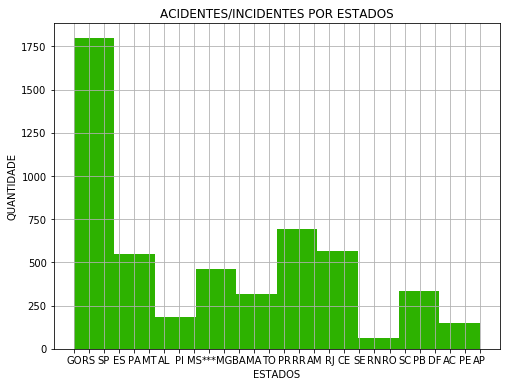

In [0]:
dados_prontos['ocorrencia_uf'].hist(figsize=(8, 6), color='#2DB200')
plt.title('ACIDENTES/INCIDENTES POR ESTADOS')
plt.xlabel('ESTADOS')
plt.ylabel('QUANTIDADE')

### Acidentes e Incidentes Por Estados

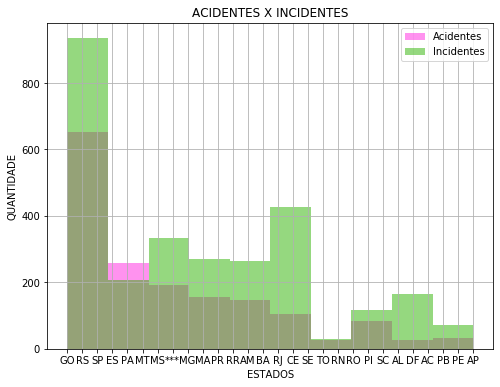

In [0]:
acidente = dados_prontos[dados_prontos.ocorrencia_classificacao == 'ACIDENTE']
incidente = dados_prontos[dados_prontos.ocorrencia_classificacao == 'INCIDENTE']

plt.title('ACIDENTES X INCIDENTES')
plt.xlabel('ESTADOS')
plt.ylabel('QUANTIDADE')

estado_aci = acidente['ocorrencia_uf']
estado_inc = incidente['ocorrencia_uf']

estado_aci.hist(figsize=(8,6), alpha=0.5, label='Acidentes', color='#FF26E1')

estado_inc.hist( figsize=(8,6), alpha=0.5, label='Incidentes', color='#2DB200')
plt.legend(loc='upper right')




### Quantidade de Acidentes e Incidentes Por Ano

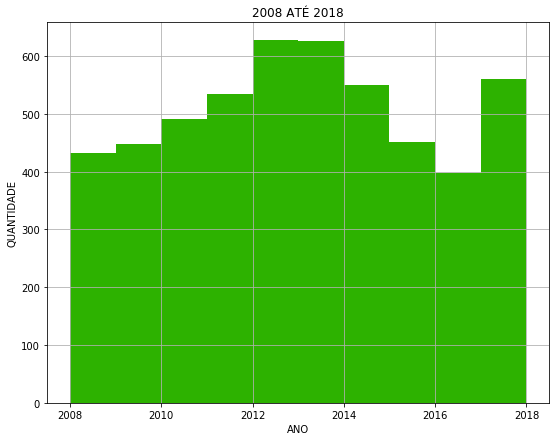

In [0]:
plt.title('2008 ATÉ 2018')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE')

dados_prontos['ano'].hist(color='#2DB200')
plt.rcParams['figure.figsize'] = (9,7)
plt.show()

## Mapas

### Pop-up Map

In [128]:
mapa_br = folium.Map(location=[-12, -50],
                 zoom_start = 4, control_scale = True, prefer_canvas=True)


for i in range (0, 5000, 5):
  #if not dados_pronto[dados_prontos['latitude'][i] == -9.42: 
    folium.Marker(
        location=[dados_prontos['latitude'][i], dados_prontos['longitude'][i]],
        popup="Codigo da Ocorrencia: "+str(dados_prontos['codigo_ocorrencia'][i])+"<br>"
              +"<br>Estado(UF): "+dados_prontos['ocorrencia_uf'][i]+"<br>"
              +"<br>Cidade:"+dados_prontos['ocorrencia_cidade'][i]+"<br>"
              +"<br>Classificacao da Ocorrencia: "+dados_prontos['ocorrencia_classificacao'][i]+"<br>"
              +"<br>Tipo de Ocorrencia: "+dados_prontos['ocorrencia_tipo'][i]+"<br>"
              +"<br>Data:"+dados_prontos['ocorrencia_dia'][i]+"<br>"
              +"<br>Modelo Aeronave: "+dados_prontos['aeronave_modelo'][i]+"<br>"
              +"<br>Ano Fabricacao Aeronave: "+str(dados_prontos['aeronave_ano_fabricacao'][i])+"<br>"
              +"<br>Quantidade de Fatores Contribuintes: "+str(dados_prontos['quantidade_fatores_contribuintes'][i])+"<br>",
        icon=folium.Icon(color='red', icon='info-sign'),
    ).add_to(mapa_br)

mapa_br

### Bubble Map

In [0]:
#quantidade = {'UF': list(set(dados_prontos['ocorrencia_uf'])), 'Quantidade': list(dados_prontos['ocorrencia_uf'].value_counts())}
#data_br = pd.DataFrame(quantidade)
#data_br
#cidades = list(set(dados_prontos['ocorrencia_uf']))
#ocorrecias = list(dados_prontos['ocorrencia_uf'].value_counts())
#dic = {i: ocorrecias for i in cidades}
v = dados_prontos['ocorrencia_uf'].value_counts()
v

In [0]:
data = pd.DataFrame ({
    'lat' : [-23.52, -22.9, -19.81, -25.42,  -30.03, -16.67, -1.45, -15.59, -3.1,    -12.97, -27.59,  -15.78,  -20.44,  -8.05,    -3.71,   -20.31,   -2.53,   -9.97,   -26.48,   2.82,   -5.08,   -8.76,  -7.11,    -10.91,   -9.66,    -6.19,    0.03,       -9.42],
    'lon' : [-46.63, -43.2, -43.95, -49.27,  -51.23, -49.25, -48.5, -56.09, -60.02,  -38.51, -48.54,   -47.93, -54.64,  -34.88,   -38.54,  -40.33,   -44.3,  -67.81,   -51.99,  -60.67,  -42.8,   -63.9,  -34.86,   -37.07,   -35.73,   -35.16,   -51.06,     -30.89],
    'name' : ['SP',   'RJ',   'MG',   'PR',   'RS',   'GO',  'PA',  'MT',    'AM',   'BA',    'SC',   'DF',     'MS',    'PE',    'CE',    'ES',      'MA',   'AC',     'TO',   'RR',     'PI',   'RO',   'PB',     'SE',     'AL',     'RN',    'AP',    'AGUAS INTERNACIONAIS'],
    'value' : [1191,  496,    458,    428,    344,    263,   244,   238,     216,    206,      160,    154,     129,     87,       71,      66,       59,     52,       51,     51,       38,      28,     20,      19,       16,       15,       13,         3]
})

#data

In [133]:
map_br = folium.Map(location=[-12, -50],
                 zoom_start = 4, control_scale = True, prefer_canvas=True)


data['value']=data.value.astype(float)

for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup="<br>ESTADO: "+data.iloc[i]['name']+"<br>"+"<br>QUANTIDADE: " + str(int(data['value'][i])),
      radius=data.iloc[i]['value']*300,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map_br)

map_br

## Para Terminar...

###1. Pegar as cidades com maiores incidencias e colocar quais os principais tipos de acidentes, se ouve obitos, quais os principais tipos de aeronaves e o segmento. Fazer isso com mapa e gráficos.

###2.Relação entre os tipos de operação e a classificação da ocorrencia

###3.Anos de maiores acidentes e numero de fatalidades classificando pelas cidades.

###4. Classificação por regiões do país.

- Histograma

- Dot-plot

- Pareto

- Estratificação

- Gráficos de Controle

- Fluxograma

- Diagramas Causa e Efeito




In [0]:
dados_prontos.head(1)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao,ano,latitude,longitude
0,201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,2012-11-15,12:40:00,ABADIA DE GOIAS,GO,BRASIL,****,PPZGV,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,1.0,430,2.0,1985.0,BRASIL,PET,EXPERIMENTAL,****,****,MANOBRA,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06,2012,-16.75,-49.43


In [0]:
dados_limpos1 = dados_prontos.loc[(dados_prontos['ocorrencia_classificacao']) == 'INCIDENTE',#Apartir daqui coloque as colunas que deseja
                  ['codigo_ocorrencia', 'ocorrencia_classificacao',
                  'ocorrencia_tipo', 'ocorrencia_cidade', 'aeronave_modelo', 'quantidade_fatalidades',
                   'latitude', 'longitude']]
#dados_limpos1.head()


In [0]:
dados_prontos['quantidade_fatalidades'].dropna(inplace=True)
dados_prontos['quantidade_fatalidades'].isnull().sum()

0

In [0]:
#dados_prontos

In [0]:
dados_limpos2 = dados_prontos.loc[(dados_prontos['ocorrencia_classificacao']) == 'ACIDENTE',
                                  ['codigo_ocorrencia', 'ocorrencia_classificacao','ocorrencia_tipo',
                                   'ocorrencia_cidade', 'aeronave_modelo', 'quantidade_fatalidades',
                                   'latitude', 'longitude']]

#dados_limpos2.head()                               

In [0]:
fatalidade_incidentes = 0
for i in range(len(dados_prontos)):
  if dados_prontos['ocorrencia_cidade'][i] == 'RIO DE JANEIRO':
    fatalidade_incidentes += dados_prontos['quantidade_fatalidades']

#fatalidade_incidentes

### Mapa com as 10 cidades com maiores Acidentes

In [169]:
d_incidentes = pd.DataFrame ({
    'fatalidade' : [21, 12, 0, 9, 2, 19, 0, 0, 2, 1],
    'lat' : [-22.9, -23.54, -23.46, -19.81, -15.78, -23.31, -22.9, -30.03, -16.67, -12.97],
    'lon' : [-43.2, -46.63, -46.53, -43.95, -47.93, -51.16, -47.06, -51.23, -49.25, -38.51],
    'cidade' : ['RIO DE JANEIRO', 'SAO PAULO', 'GUARULHOS', 'BELO HORIZONTE', 'BRASILIA', 'LONDRINA',
                'CAMPINAS','PORTO ALEGRE', 'GOIANIA', 'SALVADOR'],
    'regiao' : ['SUDESTE','SUDESTE','SUDESTE','SUDESTE','CENTRO-OESTE', 'SUL', 'SUDESTE', 'SUL',
                'CENTRO-OESTE', 'NORDESTE'],
    'estado' : ['RJ','SP','SP','MG','DF','PR','SP','RS','GO', 'BA'],
    'acidentes' : [239, 202, 137, 133, 123, 100, 96, 78, 76, 75]
    })
d_incidentes

,fatalidade,lat,lon,cidade,regiao,estado,acidentes
0,21,-22.90,-43.20,RIO DE JANEIRO,SUDESTE,RJ,239
1,12,-23.54,-46.63,SAO PAULO,SUDESTE,SP,202
2,0,-23.46,-46.53,GUARULHOS,SUDESTE,SP,137
3,9,-19.81,-43.95,BELO HORIZONTE,SUDESTE,MG,133
4,2,-15.78,-47.93,BRASILIA,CENTRO-OESTE,DF,123
5,19,-23.31,-51.16,LONDRINA,SUL,PR,100
6,0,-22.90,-47.06,CAMPINAS,SUDESTE,SP,96
7,0,-30.03,-51.23,PORTO ALEGRE,SUL,RS,78
8,2,-16.67,-49.25,GOIANIA,CENTRO-OESTE,GO,76
9,1,-12.97,-38.51,SALVADOR,NORDESTE,BA,75


In [170]:
mapa_incidente = folium.Map(location=[-23.54	, -46.63	],
                 zoom_start = 5.4, control_scale = True, prefer_canvas=True)

d_incidentes['acidentes']=d_incidentes.acidentes.astype(float)

for i in range(len(d_incidentes)):
   folium.Circle(
      location=[d_incidentes.iloc[i]['lat'], d_incidentes.iloc[i]['lon']],
      popup="<br>CIDADE: "+d_incidentes.iloc[i]['cidade']+"<br>"+
            "<br>FATALIDADES: " + str(d_incidentes.iloc[i]['fatalidade'])+"<br>"+
            "<br>ESTADO: "+d_incidentes.iloc[i]['estado']+"<br>"+
            "<br>REGIAO: "+d_incidentes.iloc[i]['regiao'],
      radius=d_incidentes.iloc[i]['acidentes']*500,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(mapa_incidente)


mapa_incidente


